In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data_table=pd.read_csv("/content/drive/MyDrive/Datasets/kmean_dataset.csv")
data=data_table.to_numpy()

In [ ]:
x=data

In [ ]:
def euclidean_distance(p1,p2):
  d=np.sqrt(np.sum((p1-p2)**2))
  return(d)

In [ ]:
def cost_function(x,centroids,cluster_group):
  cost=0
  for i in range(x.shape[0]):
    # for j in range(centroids.shape[0]):
    a=cluster_group[i]
    cost+=(euclidean_distance(x[i,:],centroids[a])**2)
  return(cost)

In [ ]:
def initialise_centroids(x,k):
  indices=np.arange(0,x.shape[0],1)
  random_indices=np.random.choice(indices,k,replace=False)
  centroids=np.array(x[random_indices])
  return(centroids)

In [ ]:
def assign_centroids(x,centroids):
  cluster_group=[]
  for i in x:
    distance=[]
    for j in range(centroids.shape[0]):
      distance.append(euclidean_distance(i,centroids[j,:]))
    min_distance=min(distance)
    index_pos = distance.index(min_distance)
    cluster_group.append(index_pos)
  return(np.array(cluster_group))

In [ ]:
def move_centroids(x,cluster_group,k):
  new_centroids=[]
  for i in range(k):
    new_centroids.append(x[cluster_group==i].mean(axis=0))
  return(np.array(new_centroids))

In [ ]:
def fit_predict(x,k,iterations):
  centroids=initialise_centroids(x,k)
  for i in range(1,iterations+1):
    cluster_group=assign_centroids(x,centroids)
    old_centroids=centroids
    centroids=move_centroids(x,cluster_group,k)
    if (old_centroids==centroids).all():
      break
  return(cluster_group,centroids)

In [ ]:
def run_k_means(x,k):
  cost_min=1e30
  for i in range(1,201):
    cluster_group,centroids=fit_predict(x,k,100)
    c=cost_function(x,centroids,cluster_group)
    if c<cost_min:
      cost_min=c
      cluster_group_min=cluster_group
  print("For k= ",k,"   Cost: ",cost_min)
  return(cost_min,cluster_group_min)

In [ ]:
k_choosen=np.zeros((15,))
cost_for_k=np.zeros((15,))
for i in range(1,16):
  c,_=run_k_means(x,i)
  cost_for_k[i-1]=c
  k_choosen[i-1]=i

For k=  1    Cost:  17592296.383508477
For k=  2    Cost:  4543749.61453186
For k=  3    Cost:  2370689.68678297
For k=  4    Cost:  1331903.0622637179
For k=  5    Cost:  916379.1871539169
For k=  6    Cost:  647326.002026085
For k=  7    Cost:  412137.50910045835
For k=  8    Cost:  323211.55263465445
For k=  9    Cost:  270954.9292415376
For k=  10    Cost:  217887.37856033296
For k=  11    Cost:  186937.13060902758
For k=  12    Cost:  168109.58554964347
For k=  13    Cost:  148385.81886169672
For k=  14    Cost:  137420.0371083824
For k=  15    Cost:  119431.72363756289


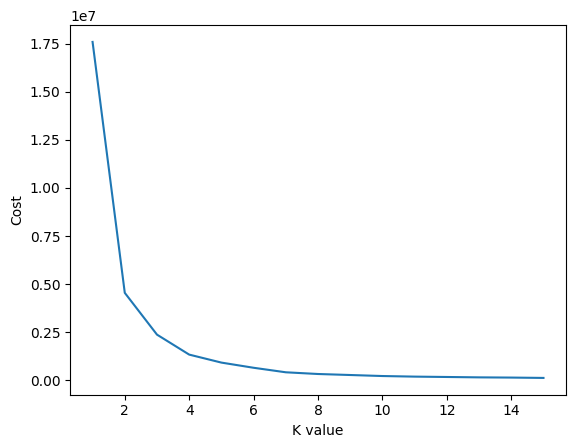

In [ ]:
plt.plot(k_choosen,cost_for_k)
plt.xlabel("K value")
plt.ylabel("Cost")
plt.show()

###We choose k=4 as the best option for k

In [ ]:
def fit_predict_final(x,k,iterations):
  cost=[]
  itera=[]
  centroids=initialise_centroids(x,k)
  for i in range(1,iterations+1):
    cluster_group=assign_centroids(x,centroids)
    old_centroids=centroids
    centroids=move_centroids(x,cluster_group,k)
    if (old_centroids==centroids).all():
      break
    c=cost_function(x,centroids,cluster_group)
    cost.append(c)
    itera.append(i)
  return(cluster_group,centroids,cost,itera)

In [ ]:
cost_min=1e30
k=4
cost_min_list=[]
itera_min=[]
itera_main=[]
cost_main=[]
for i in range(1,501):
  cluster_group,centroids,cost_list,itera=fit_predict_final(x,k,100)
  c=cost_function(x,centroids,cluster_group)
  itera_main.append(i)
  cost_main.append(c)
  if c<cost_min:
    cost_min=c
    cost_min_list=cost_list
    itera_min=itera
    cluster_group_min=cluster_group
print("For k = 4, I get the following result->")
print("Cost: ",cost_min)
print("The cluster group is as follows->")
print(cluster_group_min)

For k = 4, I get the following result->
Cost:  1331903.0622637179
The cluster group is as follows->
[0 0 3 3 2 3 3 3 0 0 3 3 3 0 3 3 3 0 3 2 2 2 0 0 2 2 3 3 0 0 3 3 0 3 0 0 0
 0 0 2 2 0 0 2 0 0 0 0 0 3 0 3 3 3 0 0 0 3 3 1 2 1 2 1 1 2 1 1 2 2 0 1 1 0
 0 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 2 1 2 2 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 0 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


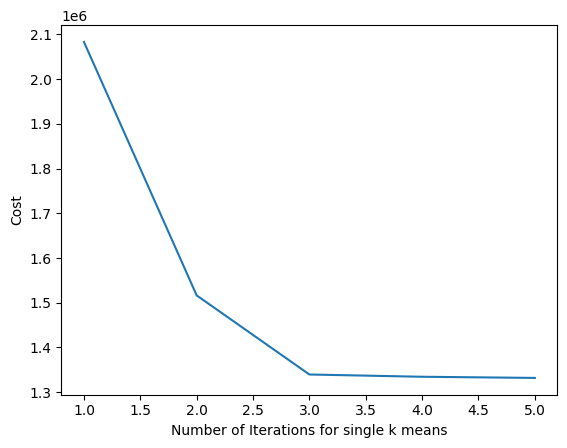

In [ ]:
plt.plot(itera_min,cost_min_list)
plt.xlabel("Number of Iterations for single k means")
plt.ylabel("Cost")
plt.show()

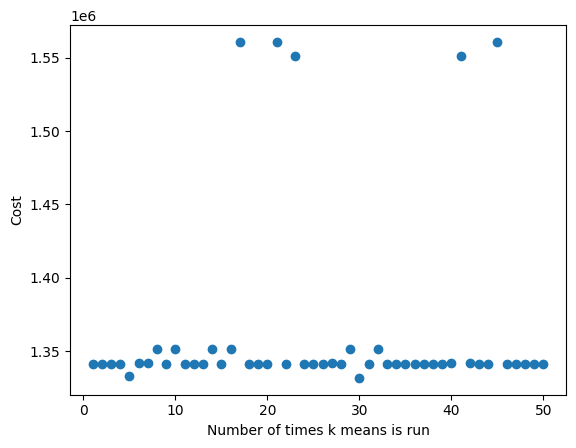

In [ ]:
plt.scatter(itera_main[:50],cost_main[:50])
plt.xlabel("Number of times k means is run")
plt.ylabel("Cost")
plt.show()